# Car Damage Dataset
https://www.kaggle.com/code/lplenka/detectron2-car-damage-detection/data

In [ ]:
%matplotlib inline
import random

import matplotlib.pyplot as plt
import pylab
import skimage.io as io
from pycocotools.coco import COCO

pylab.rcParams["figure.figsize"] = (8.0, 10.0)

In [2]:
# I am visualizing some images in the 'val/' directory

dataDir = "../data/val"
dataType = "COCO_val_annos"
mul_dataType = "COCO_mul_val_annos"
annFile = "{}/{}.json".format(dataDir, dataType)
mul_annFile = "{}/{}.json".format(dataDir, mul_dataType)
img_dir = "../data/img"

In [3]:
# initialize coco api for instance annotations
coco = COCO(annFile)
mul_coco = COCO(mul_annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [4]:
# display categories and supercategories

# Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms = [cat["name"] for cat in cats]
print("COCO categories for damages: \n{}\n".format(", ".join(nms)))

nms = set([cat["supercategory"] for cat in cats])
print("COCO supercategories for damages: \n{}\n".format(", ".join(nms)))

# Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms = [cat["name"] for cat in mul_cats]
print("COCO categories for parts: \n{}\n".format(", ".join(mul_nms)))

mul_nms = set([mul_cat["supercategory"] for mul_cat in mul_cats])
print("COCO supercategories for parts: \n{}\n".format(", ".join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [5]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=["damage"])
imgIds = coco.getImgIds(catIds=catIds);

In [6]:
random_img_id = random.choice(imgIds)
print(
    "{} image id was selected at random from the {} list".format(random_img_id, imgIds)
)

5 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [7]:
# Load the image
imgId = coco.getImgIds(imgIds=[random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n", img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '42.jpg', 'flickr_url': '', 'height': 1024, 'id': 5, 'license': 1, 'width': 1024}


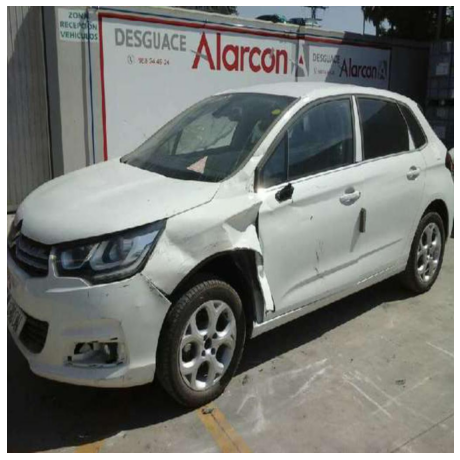

In [8]:
I = io.imread(img_dir + "/" + img["file_name"])
plt.axis("off")
plt.imshow(I)
plt.show()

In [9]:
# get damage annotations
annIds = coco.getAnnIds(imgIds=imgId, iscrowd=None)
anns = coco.loadAnns(annIds)

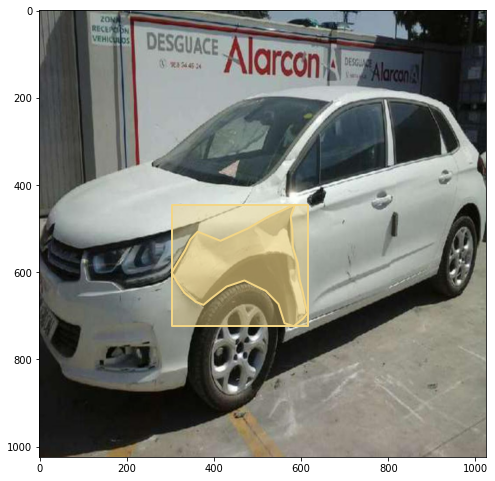

In [10]:
# Plot damages
plt.imshow(I)
plt.axis("on")
coco.showAnns(anns, draw_bbox=True)

In [11]:
# get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId, iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [12]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele["id"]: ele["name"]})

In [13]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['headlamp', 'front_bumper', 'door', 'hood']


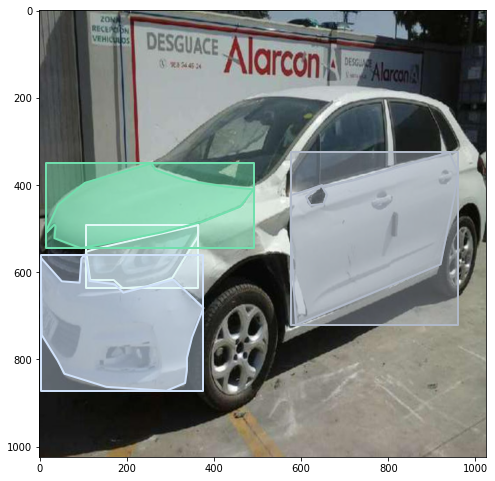

In [14]:
# Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region["category_id"]])

print("Parts are:", parts)

# Plot Parts
I = io.imread(img_dir + "/" + img["file_name"])
plt.imshow(I)
plt.axis("on")
mul_coco.showAnns(mul_anns, draw_bbox=True)